<a href="https://colab.research.google.com/github/melaniaczobit/Predicting-Heart-Failure/blob/main/Predicting_Heart_Failure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PREDICTING HEART FAILURE**

This project will utilize the k-nearest neighbours supervised classification algorithm to classify new data and predict the occurrence of heart failure in patients. 

The algorithm is simple and easy to implement. KNN can be used for classification or regression. However the drawback is that training a large dataset of predictors to determine the classification involves loading the whole dataset and using every point, requiring a large memory.

Load data and libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install -q kaggle

In [2]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [5]:
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d andrewmvd/heart-failure-clinical-data

  0% 0.00/3.97k [00:00<?, ?B/s]
100% 3.97k/3.97k [00:00<00:00, 3.45MB/s]


In [ ]:
!ls

heart-failure-clinical-data.zip  kaggle.json  sample_data


In [7]:
# Import the heart-failure-clinical-data datasets into pandas dataframe
df = pd.read_csv('heart-failure-clinical-data.zip', compression='zip', header=0, sep=',')

Check data, explore variables

In [8]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [ ]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
df.shape

(299, 13)

There are 299 observations and 13 columns. 

* Age: age of patient
* Anaemia: decrease of red blood cells, boolean (0:False, 1:True)
* Creatinine Phosphokinase: Level of CPK enzyme in blood (mcg/L)
* Diabetes: If patient has diabetes, boolean (0:False, 1:True)
* Ejection Fraction: Percentage of blood leaving the heart at each contraction
* High Blood Pressure: If the patient has hypertension, boolean (0:False, 1:True)
* Platelets: Platelets in the blood (kiloplatelets/mL)
* Serum Creatinine: Level of serum creatinine in the blood (mg/dL)
* Serum Sodium: Level of serum sodium in the blood (mEq/L)
* Sex: Female or Male, binary (0:Female, 1:Male)
* Smoking: If the patient smokes or not, boolean (0:False, 1:True)
* Time: Follow-up period (days)
* Death_EVENT: If the patient died during the follow-up period, boolean (0:False, 1:True)


In [ ]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:
# no missing values
print (df.isnull().values.any())

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


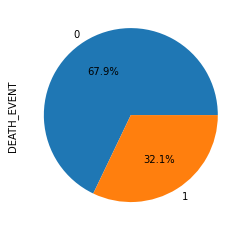

In [ ]:
df['DEATH_EVENT'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

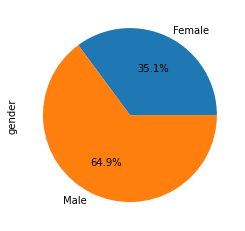

In [ ]:
labels = ['Female', 'Male']
df.groupby('sex').size().plot(kind='pie',labels=labels,autopct='%1.1f%%',label='gender')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

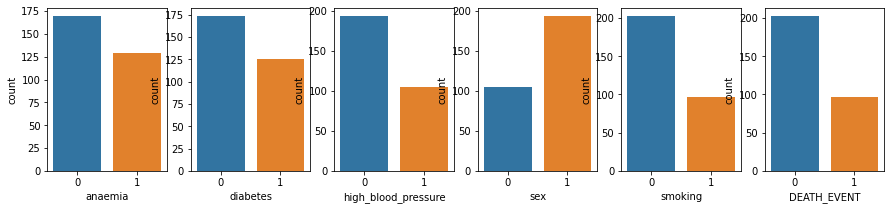

In [ ]:
# Plotting the categorical values (anaemia, diabetes, high_blood_pressure, sex, smoking and DEATH_EVENT)

fig, ax =plt.subplots(ncols=6, figsize = (15,3))
sns.countplot(df['anaemia'], ax=ax[0])
sns.countplot(df['diabetes'], ax=ax[1])
sns.countplot(df['high_blood_pressure'], ax=ax[2])
sns.countplot(df['sex'], ax=ax[3])
sns.countplot(df['smoking'], ax=ax[4])
sns.countplot(df['DEATH_EVENT'],ax=ax[5])
fig.show()

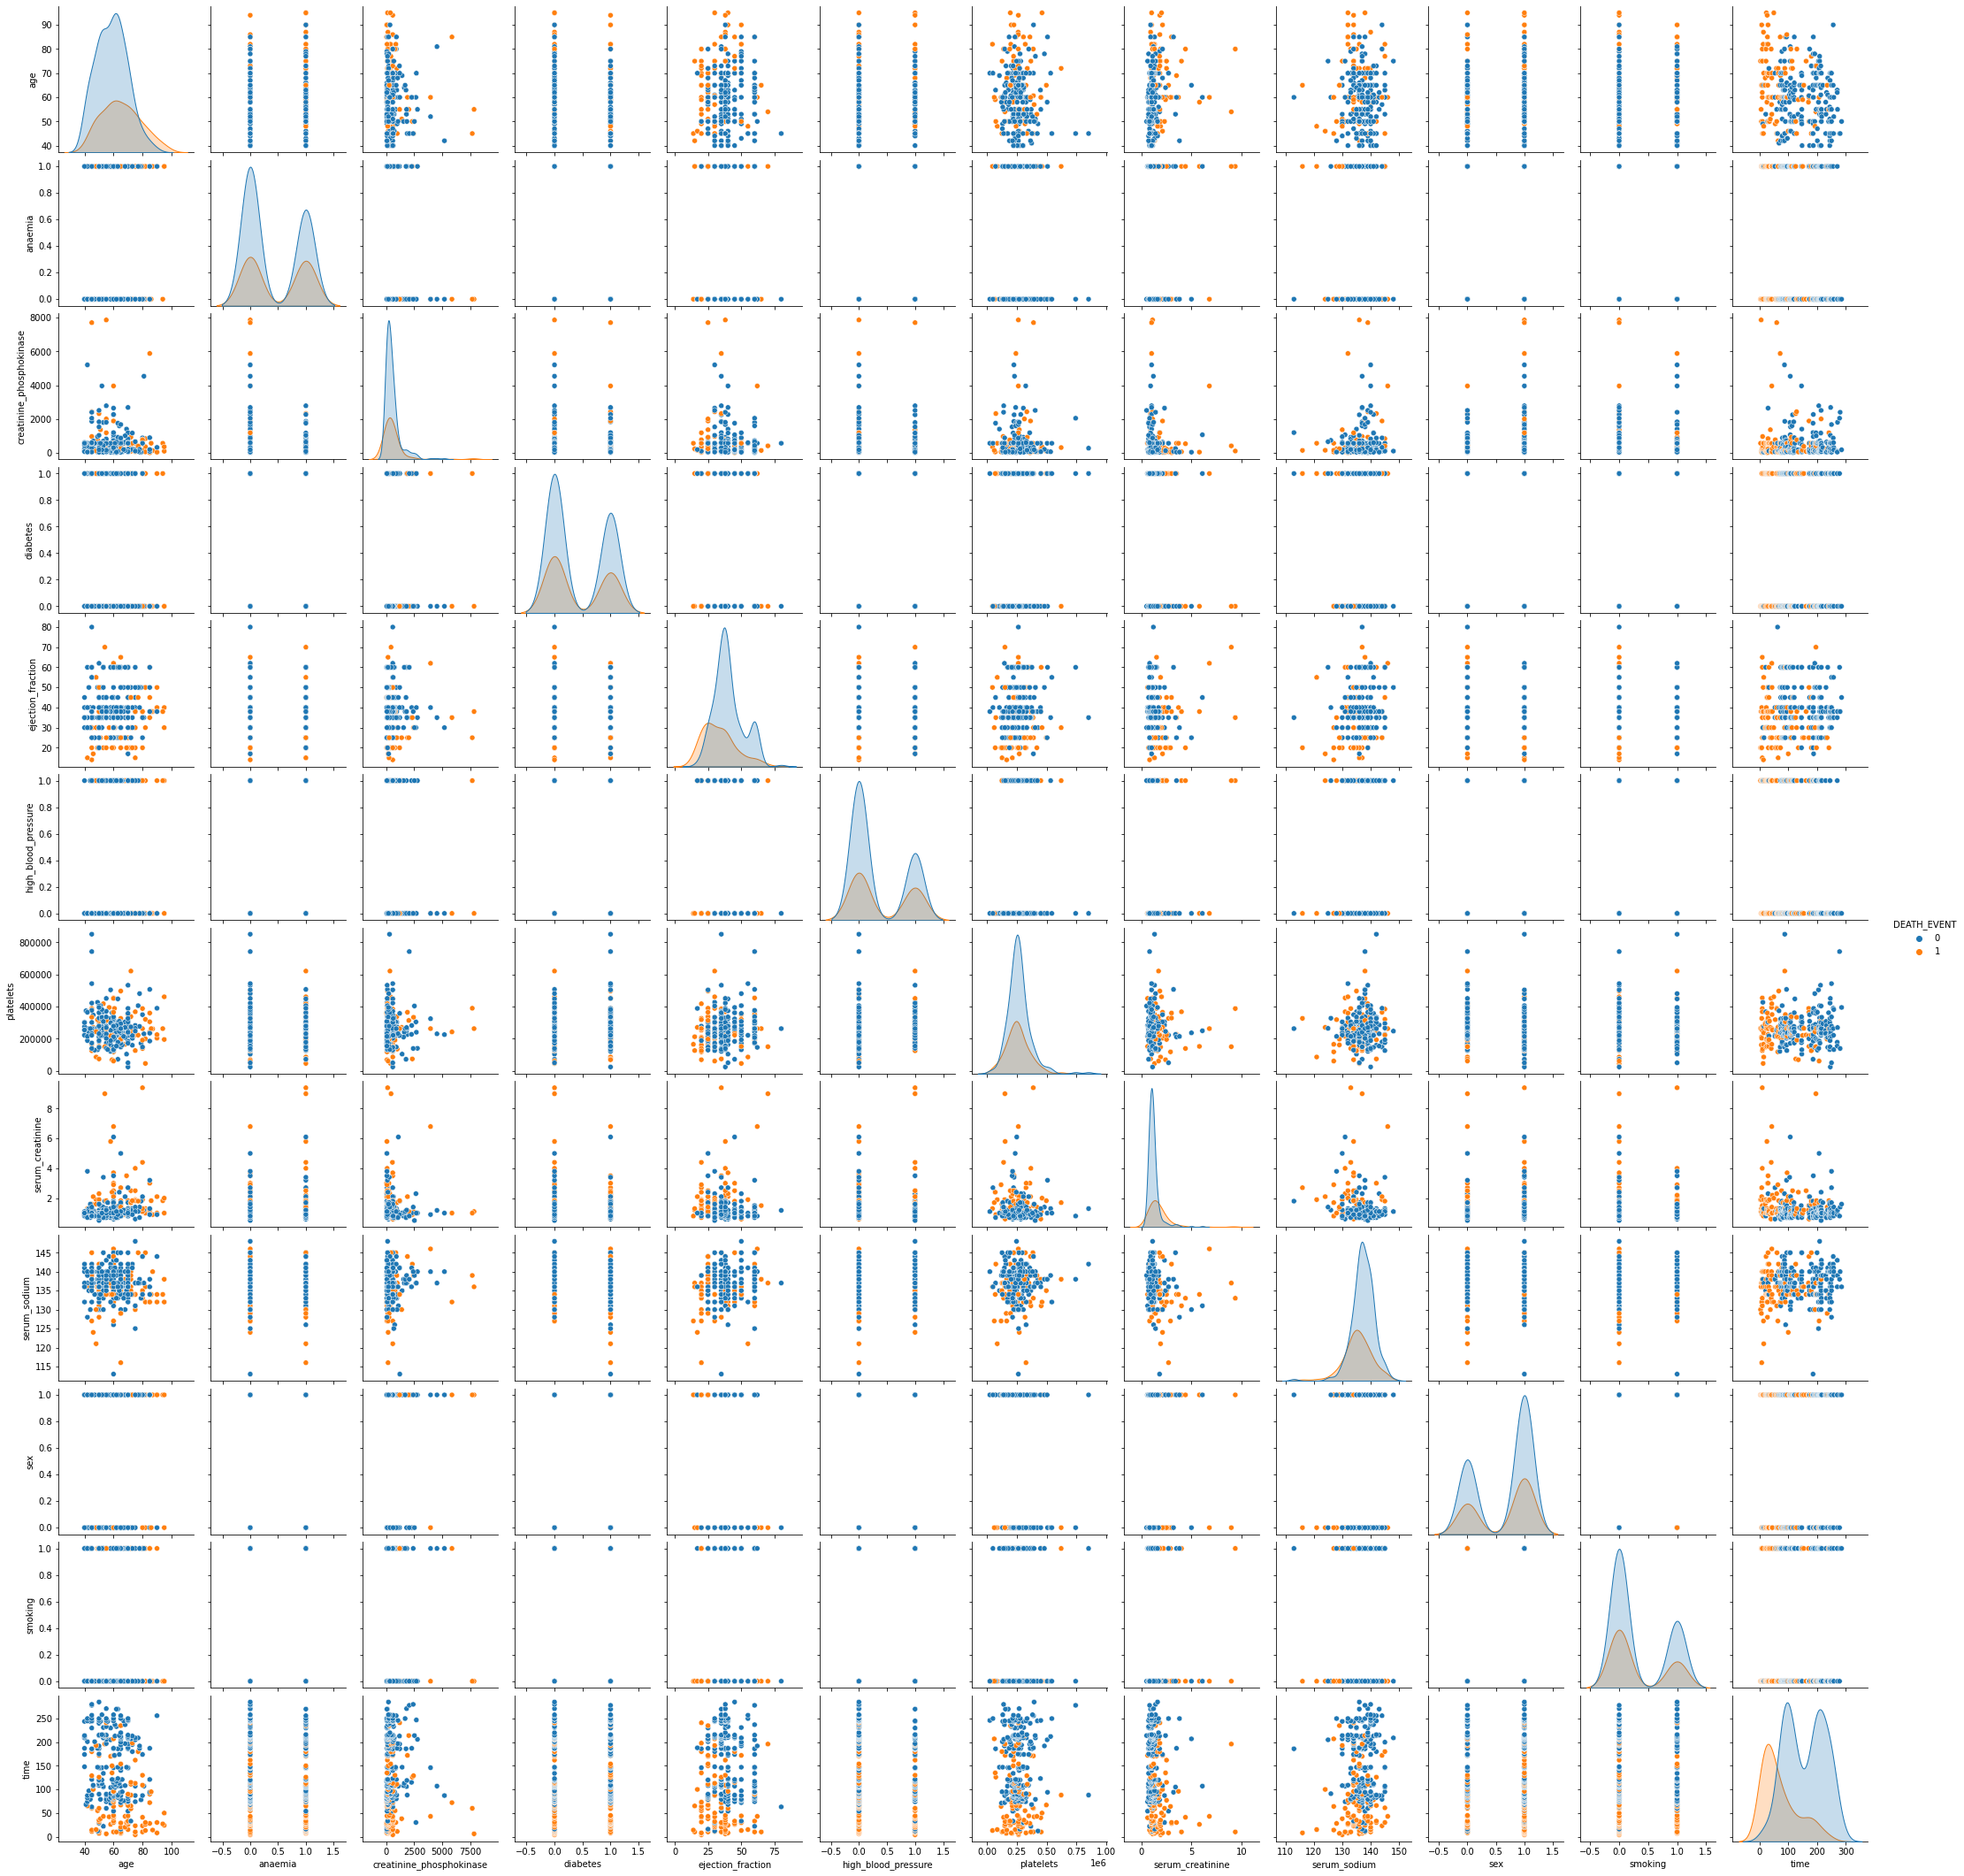

In [ ]:
sns.pairplot(df, hue="DEATH_EVENT")
plt.show()

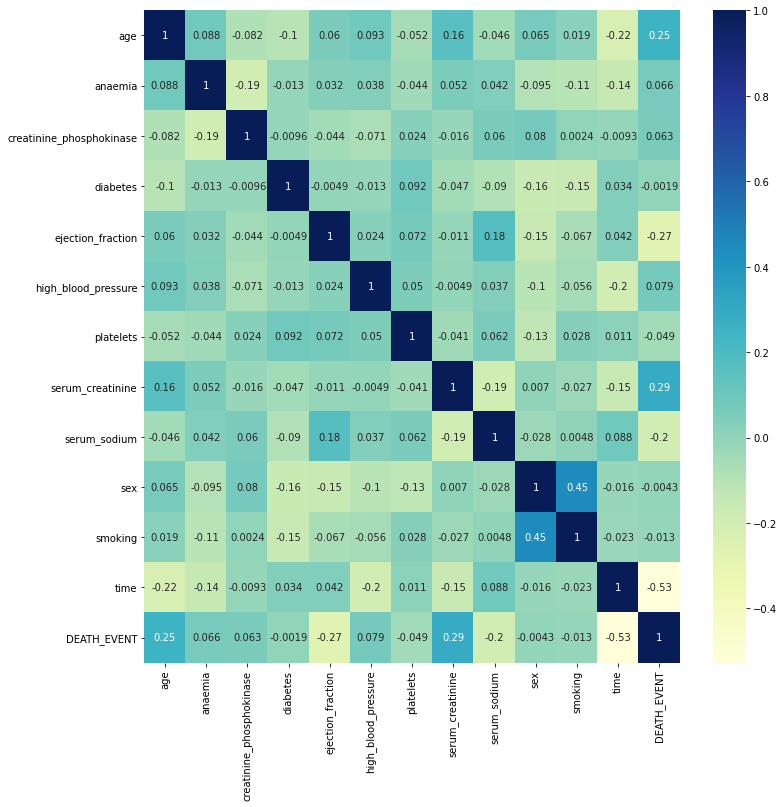

In [ ]:
plt.figure(figsize=(12,12))
cor = df.corr()
sns.heatmap(cor,annot=True, cmap='YlGnBu')
plt.show()

Applying the KNN Algorithm

The KNN algorithm computes the distance of a new data point with the training data points. The model identifies k points that are that are closest to the new one. The most common label among the k points is the new label of the data point, that being whether the pateint will be subject to heart failure or not. 

In [9]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [72]:
X=df.drop('DEATH_EVENT', 1)
y=df['DEATH_EVENT'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [73]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [74]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test,y_pred))

[[36  9]
 [11  4]]
              precision    recall  f1-score   support

           0       0.77      0.80      0.78        45
           1       0.31      0.27      0.29        15

    accuracy                           0.67        60
   macro avg       0.54      0.53      0.53        60
weighted avg       0.65      0.67      0.66        60

Accuracy: 0.6666666666666666


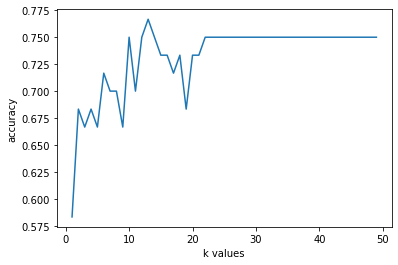

Maximum KNN accuracy score: 0.7666666666666667


In [63]:
scores = {}
scoresList=[]
k_range= range(1,50)
for k in k_range:
    knnModel=KNeighborsClassifier(n_neighbors=k)
    knnModel.fit(X_train,y_train)
    y_pred = knnModel.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test,y_pred)
    scoresList.append(metrics.accuracy_score(y_test,y_pred))

# to visualize the best value of k    
plt.plot(k_range,scoresList)  
plt.xlabel("k values")        
plt.ylabel("accuracy")
plt.show()

print('Maximum KNN accuracy score:',max(scoresList))

In [85]:
# Let's input a new data point to determine whether a patient will suffer from heart failure
# choose an optimal value of k, k=13
label = {0:'false',1:'true'}

knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train,y_train)

# This patient is 55 years old, does not have anaemia, has diabetes, has high blood pressure, is male, does not smoke and has a follow-up after 20 days
new_patient = [[55,0,61,1,38,1,155000,1.1,143,1,0,20]]
new_patient2 = [[65,1,160,1,20,0,327000,2.7,116,0,0,8]]
new_patient3 = [[50,0,196,0,45,0,395000,1.6,136,1,1,285]]

outcome = knn.predict(new_patient)
outcome2 = knn.predict(new_patient2)
outcome3 = knn.predict(new_patient3)

print(label[outcome[0]])
print(label[outcome2[0]])
print(label[outcome3[0]])

false
false
true
